Beginning idea for two datasets: States/Kentucky & Some Measureable form of sugar/corn consumption combined with States/Kentucky & Diabetes/Other Health Issue Statistics

After cleaning & joining, use these two statistics to calculate a new statistic of measure

Then write about the initial thoughts and eventual conclusions.

Update: The sugar data was wishful thinking. Time is dwindling, so I'll need to comb for datasets a little more stringently, with more open minded intentions.

Back to the drawing board, somewhat. Settled with an API pulling 2020 census data that gives me population.

OBJECTIVES:

1. Read in two datasets from API calls. The first provides population information for all fifty states, the District of Columbia, and Puerto Rico.

In [2]:
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
response = req.get("https://datausa.io/api/data?drilldowns=State&measures=Population&year=2020")
json = response.json()
df = pd.json_normalize(data = json, record_path = ["data"])
df

,ID State,State,ID Year,Year,Population,Slug State
0,04000US01,Alabama,2020,2020,4893186,alabama
1,04000US02,Alaska,2020,2020,736990,alaska
2,04000US04,Arizona,2020,2020,7174064,arizona
3,04000US05,Arkansas,2020,2020,3011873,arkansas
4,04000US06,California,2020,2020,39346023,california
5,04000US08,Colorado,2020,2020,5684926,colorado
6,04000US09,Connecticut,2020,2020,3570549,connecticut
7,04000US10,Delaware,2020,2020,967679,delaware
8,04000US11,District of Columbia,2020,2020,701974,district-of-columbia
9,04000US12,Florida,2020,2020,21216924,florida


Let's clean that, first. Clear the useless columns, and provide the year of the Population count beside it.

In [3]:
df.drop(df.columns[[0,2,3,5]], axis=1, inplace=True)
df.rename(columns = {"Population":"Population (2020)"}, inplace = True)
df

,State,Population (2020)
0,Alabama,4893186
1,Alaska,736990
2,Arizona,7174064
3,Arkansas,3011873
4,California,39346023
5,Colorado,5684926
6,Connecticut,3570549
7,Delaware,967679
8,District of Columbia,701974
9,Florida,21216924


The second API call pulls Diabetes Prevalence data. This statistic makes a point that it is only for ages 20 and up.

In [4]:
responseTwo = req.get("https://datausa.io/api/data?drilldowns=State&measures=Diabetes%20Prevalence&year=2020")
jsonTwo = responseTwo.json()
dfTwo = pd.json_normalize(data = jsonTwo, record_path = ["data"])
dfTwo

,ID State,State,ID Year,Year,Diabetes Prevalence,Slug State
0,04000US01,Alabama,2020,2020,0.142,alabama
1,04000US02,Alaska,2020,2020,0.079,alaska
2,04000US04,Arizona,2020,2020,0.097,arizona
3,04000US05,Arkansas,2020,2020,0.134,arkansas
4,04000US06,California,2020,2020,0.086,california
5,04000US08,Colorado,2020,2020,0.063,colorado
6,04000US09,Connecticut,2020,2020,0.089,connecticut
7,04000US10,Delaware,2020,2020,0.115,delaware
8,04000US11,District of Columbia,2020,2020,0.081,district-of-columbia
9,04000US12,Florida,2020,2020,0.106,florida


Let's do the same for here, as well:

In [5]:
dfTwo.drop(dfTwo.columns[[0,2,3,5]], axis=1, inplace=True)
dfTwo

,State,Diabetes Prevalence
0,Alabama,0.142
1,Alaska,0.079
2,Arizona,0.097
3,Arkansas,0.134
4,California,0.086
5,Colorado,0.063
6,Connecticut,0.089
7,Delaware,0.115
8,District of Columbia,0.081
9,Florida,0.106


The idea is to calculate a very rough estimate of how many diabetic folks could possibly reside within a state. I decide to factor in a multiplier to reflect the proportions excluding ages 0-19.

2. Cleaning the data, performing a pandas merge, and calculating values based on the new dataset.

Naturally, I merge first.

In [6]:
dfThree = df.merge(dfTwo, left_on="State", right_on="State")
dfThree

,State,Population (2020),Diabetes Prevalence
0,Alabama,4893186,0.142
1,Alaska,736990,0.079
2,Arizona,7174064,0.097
3,Arkansas,3011873,0.134
4,California,39346023,0.086
5,Colorado,5684926,0.063
6,Connecticut,3570549,0.089
7,Delaware,967679,0.115
8,District of Columbia,701974,0.081
9,Florida,21216924,0.106


Puerto Rico did not have a Diabetes Prevalence statistic, so it does not make it through the merge. District of Columbia did make the cut.

In [7]:
dfThree.head(2)

,State,Population (2020),Diabetes Prevalence
0,Alabama,4893186,0.142
1,Alaska,736990,0.079


Now, let's create a statistic - a very base estimate. The additional factor is based on the statistic only covering folks 20 and up, which leaves 25 percent of the population unaccounted for. This is a lazy way to course correct.

In [8]:
dfThree["Diabetes Population Estimate"] = dfThree["Population (2020)"] * 0.75 * dfThree["Diabetes Prevalence"]
dfThree["Diabetes Population Estimate"] = dfThree["Diabetes Population Estimate"].astype(int)
dfThree.head(2)

,State,Population (2020),Diabetes Prevalence,Diabetes Population Estimate
0,Alabama,4893186,0.142,521124
1,Alaska,736990,0.079,43666


3. Make one Pandas pivot table and one Matplotlib plot.

UPDATE: After class discussion, pivot table could use groupings - by region, perhaps?

In [9]:
dfThree.pivot_table(index=["Diabetes Population Estimate", "State"], values=["Population (2020)", "Diabetes Prevalence"])

,,Diabetes Prevalence,Population (2020)
Diabetes Population Estimate,State,,
37932,Wyoming,0.087,581348
39333,Vermont,0.084,624340
42644,District of Columbia,0.081,701974
43666,Alaska,0.079,736990
51326,North Dakota,0.090,760394
64498,Montana,0.081,1061705
65290,South Dakota,0.099,879336
75368,Rhode Island,0.095,1057798
83462,Delaware,0.115,967679


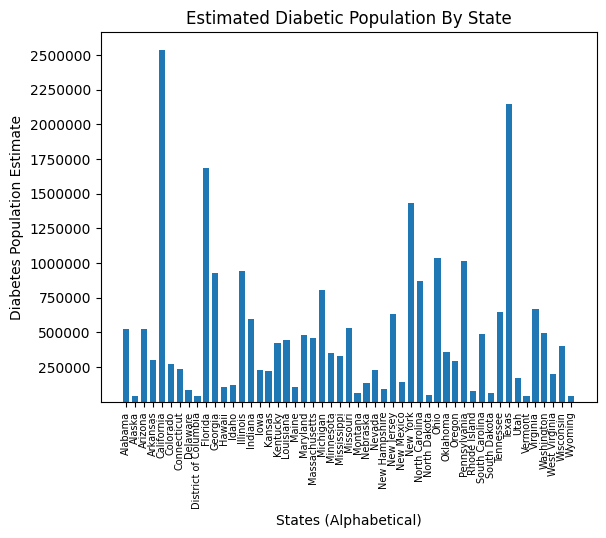

In [10]:
plt.bar("State", "Diabetes Population Estimate", width=0.7, data=dfThree)
plt.xlabel("States (Alphabetical)")
plt.xticks(fontsize=7, rotation=90)
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("Diabetes Population Estimate")
plt.yticks(ticks=[250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000, 2500000])
plt.title("Estimated Diabetic Population By State")
plt.show()

4. Utilize a virtual environment and include instructions on how to set one up.
5. Thoroughly annotated Jupyter notebook with a detailed README.md

---

edit: let's get some object info

In [13]:
df.info()
dfTwo.info()
dfThree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              52 non-null     object
 1   Population (2020)  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Diabetes Prevalence  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         51 non-null     object 
 1   Population (